<a href="https://colab.research.google.com/github/raineydavid/22-day-coding-challenge/blob/master/python/Visualisation_pandas_seaborn_correlation_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics - Challenge


The goal of this challenge is to analyze a restaurant invoices. Some cells are already implemented, you just need to **run** them. Some other cells need you to write some code.

Start the challenge by running the two following cells:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

---

❓ Display the 10 first rows of the dataset (no need to sort)

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html"><code>pandas.DataFrame.head()</code></a> function:
    
<pre>
tips_df.head(10)
</pre>
</p>
</details>

In [ ]:
# Your code here
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


---

❓ How many days per week is the restaurant open?

<details>
    <summary>🙈 Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html"><code>pandas.Series.unique()</code></a> function combiend with the <code>len()</code> Python built-in.
    
<pre>
len(tips_df['day'].unique())
</pre>
</p>
</details>

In [ ]:
# Your code here
tips_df['day'].nunique()

4

In [ ]:
tips_df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
len(tips_df['day'].unique())

4

In [ ]:
tips_df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [ ]:
# setting normalize=True
tips_df['day'].value_counts(normalize=True)

Sat     0.356557
Sun     0.311475
Thur    0.254098
Fri     0.077869
Name: day, dtype: float64

---

❓ What day of the week is there more bills? Plot this with a Seaborn Countplot.

<details>
    <summary>🙈 Reveal solution</summary>

<p>
<pre>
tips_df['day'].value_counts()
</pre>
    
<pre>
sns.countplot(data=tips_df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
</pre>
</p>
</details>

In [ ]:
# Your code here
tips_df['day'].value_counts()

<AxesSubplot:>

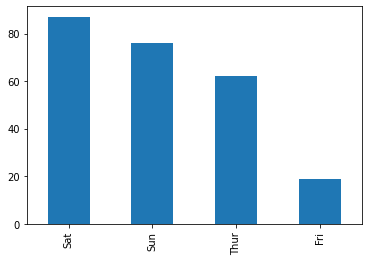

In [ ]:
tips_df['day'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='day', ylabel='count'>

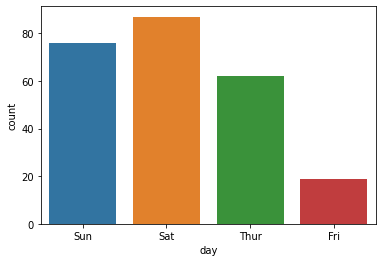

In [ ]:
# Your plot here
sns.countplot(data=tips_df, x='day')

---

❓ Try to do some other countplots, varying `x` with one of the categorical column (`sex`, `smoker`, `time`)

In [ ]:
# Your first plot here
# To add a cell, you can go in the menu and do Insert > Insert cell below

<AxesSubplot:xlabel='sex', ylabel='count'>

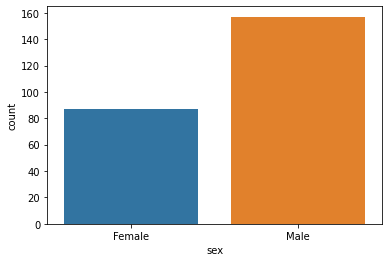

In [ ]:
sns.countplot(data=tips_df, x='sex')

<AxesSubplot:xlabel='smoker', ylabel='count'>

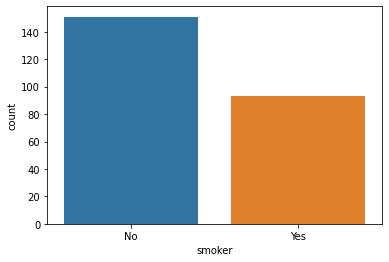

In [ ]:
sns.countplot(data=tips_df, x='smoker')

<AxesSubplot:xlabel='time', ylabel='count'>

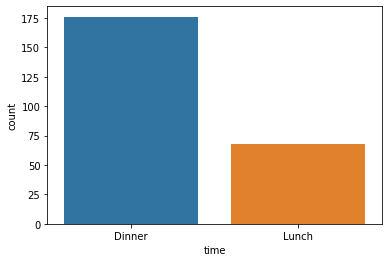

In [ ]:
sns.countplot(data=tips_df, x='time')


---
❓ Let's plot the distribution of `total_bill` based on a given category. Start with `day`:

```python
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")
```

1. Change the value of `x` with one of the categorical column of the dataset and the value of `kind` (`"bar"`, `"box"`, `"violin"`, `"boxen"`)
1. Change the value of `y` with one of the numerical column of the dataset

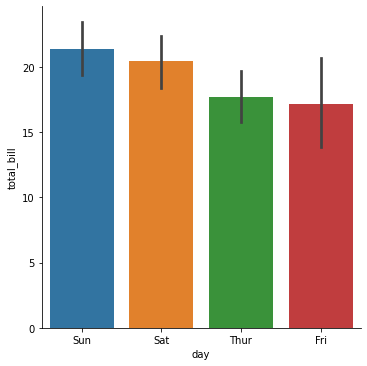

In [ ]:
# Your experiments here
sns.catplot(data=tips_df, x='day', y='total_bill', kind='bar')

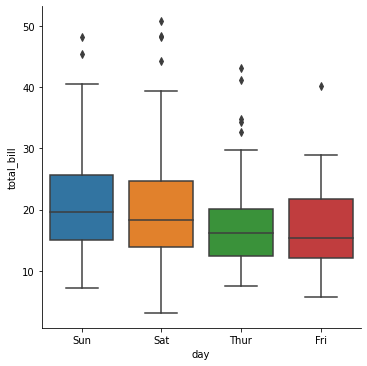

In [ ]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='box')

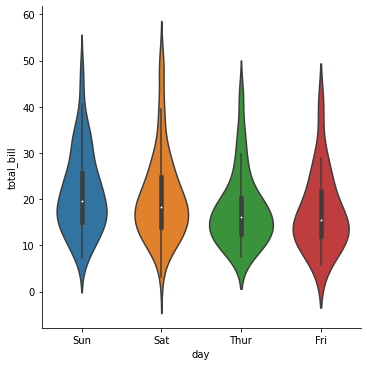

In [ ]:
sns.catplot(data=tips_df, x='day', y='total_bill', kind='violin')

---
❓ Let's use [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `col` in the first line with another column (e.g. `"time"`). Run the cell again. What do you observe?

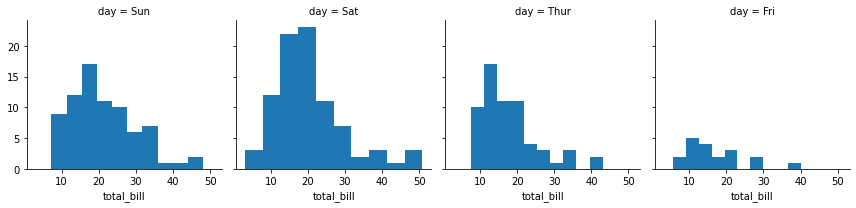

In [ ]:
g = sns.FacetGrid(tips_df, col="day")
g.map(plt.hist, "total_bill")

---
❓ Let's continue with FacetGrid and add a `row="smoker"` parameter. How many cells do you get in the plot?

<details>
    <summary>🙈 Reveal solution</summary>

You get 2 * 4 = 8 cells!
    
<pre>
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")
</pre>
</p>
</details>

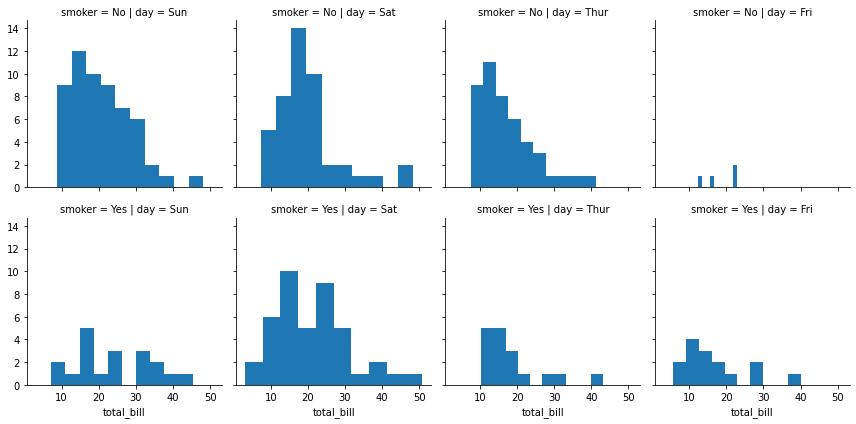

In [ ]:
# Your code here
g = sns.FacetGrid(tips_df, col="day", row ='smoker')
g.map(plt.hist, "total_bill")

## Correlation

Let's start looking for correlation between columns in the dataset.


---
❓ What is your intuition about the relationship between the columns `tip` and `total_bill`?

---
❓ Let's look at the data to see if our intuition is correct. We will do a **scatterplot** with `x` being `total_bill` and `y` the tip.

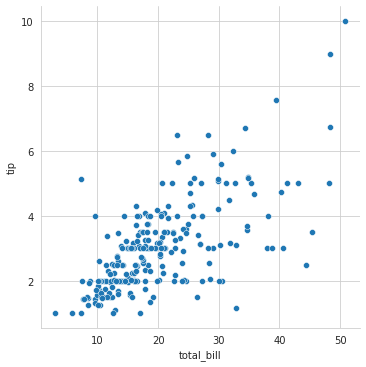

In [ ]:
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="total_bill", y="tip", data=tips_df)

---
❓ Another way of looking at this data is to use a [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

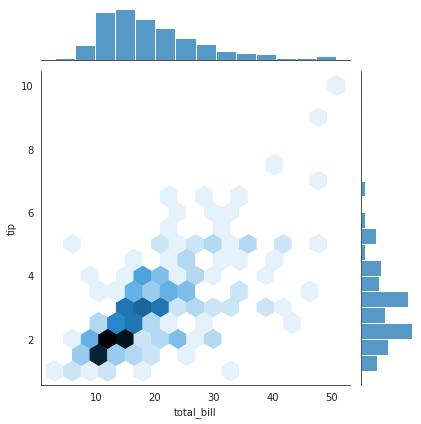

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips_df)

❓ A very useful tool to **identify** correlations is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

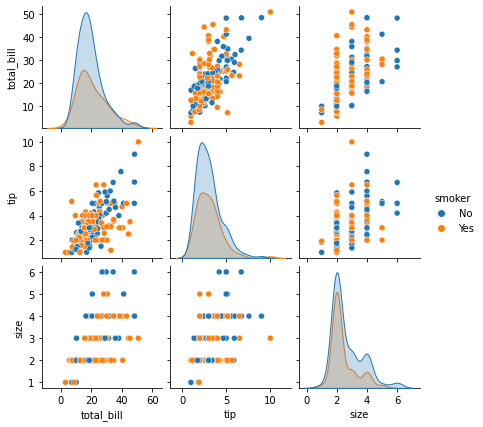

In [ ]:
sns.pairplot(tips_df, height=2, hue="smoker")

## Regression

We are not doing Machine Learning yet but we can use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to graphically read a linear correlation between two columns:

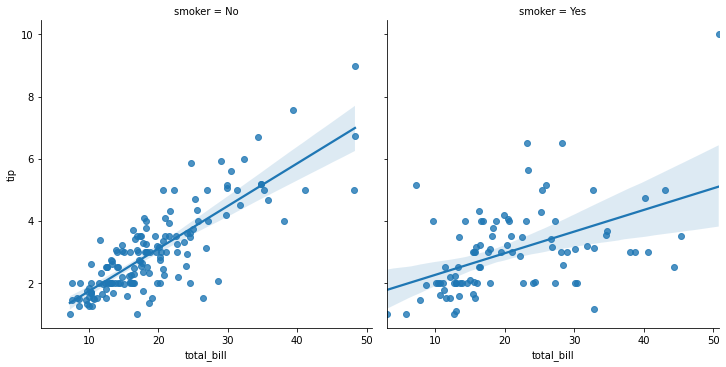

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips_df)

## Good job!

Save your notebook, go back to the **Le Wagon - Learn** platform to upload your progress. A quiz awaits you!